In [ ]:
import csv # creates table-like custom objects from the items in CSV files
import numpy as np
import matplotlib.pyplot as plt
from glob import glob #to define techniques to match specified patterns according to rules related to Unix shell
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os #provides functions for interacting with the operating system
import shutil #high-level operations on files and collections of files
#!conda install --yes -c anaconda pillow

In [ ]:
def readFromPhysionet_CSV():

    root_folder_to_read = "datasets/physionet/"
    folder_to_copy = "datasets/ourdataset/train/"
    folders = ["training-a", "training-b", "training-c", "training-d", "training-e", "training-f"]

    for folder in folders:
        csvfilename = root_folder_to_read+folder+"/REFERENCE.csv"
        folder_to_read = root_folder_to_read+folder # "datasets/physionet/training-a"

        #ouvrir  le fichier pour le décomposer encore en 'normal' et 'abnormal'
        with open(csvfilename, "r") as csvDataFile:
            data = [row for row in csv.reader(csvDataFile)] #liste du fichier csv qui contient 2 colonnes (1:nom/2:type)
            for row in data:
                wav_name = row[0]
                wav_type = row[1]
            
                #-1: normal 
                if(int(wav_type) == -1):
                    print (str(wav_name)+":"+ str(wav_type))
                    file_source = folder_to_read+"/"+wav_name+".wav" # "datasets/physionet/training-a/a0001.wav"
                    print (file_source)
                    destination = folder_to_copy+"normal" #"datasets/ourdataset/train/normal"
                    print ("- Normal class, copy from: "+folder_to_read+", to: "+destination)
                    dest = shutil.copy(file_source, destination) 

                #and 1:abnormal    
                if(int(wav_type) == 1):
                    print (str(wav_name)+":"+ str(wav_type))
                    file_source = folder_to_read+"/"+wav_name+".wav"
                    destination = folder_to_copy+"abnormal"
                    print ("- Abnormal class, copy from: "+folder_to_read+", to: "+destination)
                    dest = shutil.copy(file_source, destination) 

def readFromPascal():
    source = "datasets/pascal/"
    destination = "datasets/ourdataset/train/"
    folders = ["normal", "extra", "murmur"]
    for folder in folders:
        
        wavs = np.array(glob(source+folder+"/*.wav"))#1st iter. "datasets/pascal/normal/*.wav"

        #1st it. folder="normal"
        if(folder== "normal"):
            for wav in wavs:
                file_source = wav.replace(source+"normal/","")
                print ("- Copy file : "+source+"normal/"+file_source+" TO: "+destination+"normal/"+file_source)
                dest = shutil.copy(source+"normal/"+file_source, destination+"normal/"+file_source)
                print("After copying file:") 
                print(os.listdir(destination+"normal/")) #just bch net2kdou eli 5edmetna s7i7a w mchet hhhh
        #2st it. folder="extra"         
        elif(folder== "extra"):
            for wav in wavs:
                file_source = wav.replace(source+"extra/","")
                dest = shutil.copy(source+"extra/"+file_source, destination+"abnormal/"+file_source)
                print("After copying file:") 
                print(os.listdir(destination+"abnormal/")) 
        #3th it. folder="murmur"
        else:
            for wav in wavs:
                file_source = wav.replace(source+"murmur/","")
                dest = shutil.copy(source+"murmur/"+file_source, destination+"abnormal/"+file_source)
                print("After copying file:") 
                print(os.listdir(destination+"abnormal/")) 

In [ ]:
# Process Physionet dataset
readFromPhysionet_CSV()
# Process Pascal dataset
readFromPascal()

In [ ]:
!conda install --yes -c anaconda seaborn

In [ ]:
import scipy.io.wavfile as wavfile
import numpy
import os.path
from os import walk
from scipy import stats
import numpy as np
import librosa 
import numpy as np
from scipy.stats import norm # pour les stat 
import pickle #define an example dictionary,
import seaborn as sns
import matplotlib.pyplot as plt
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

Duration...


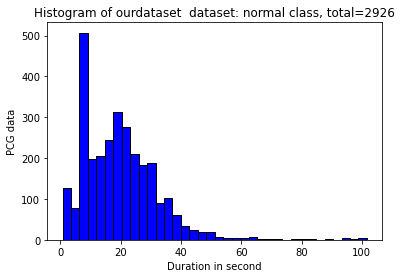

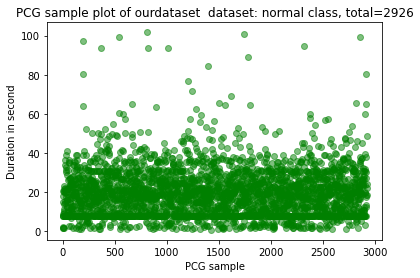

Duration...


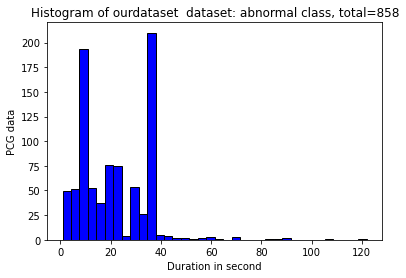

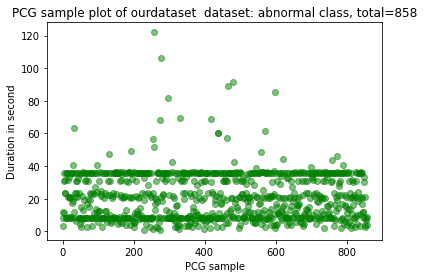

In [ ]:
def get_wav_duration(name): #durée ll wave lwa7da 
    _wavs = []
    wavs_duration = []
    for (_,_,filenames) in walk(name):
        _wavs.extend(filenames)
        break
    for _wav in _wavs:
        # read audio samples
        if(".wav" in _wav ): 
            file = name + _wav
            #datasets/ourdataset/normal/101_1305030823364_B.wav
            data, rate = librosa.load(file)
            duration = librosa.get_duration(y=data, sr=rate)
            print ("- file: "+ file+", duration: "+str(duration))
            wavs_duration.append(duration)
    return wavs_duration

def getDuration(folder, file_name): #durée  mtaa lkol nlemouhom f dict
    types = ["normal", "abnormal"]
    for type in types:
        wavs_duration = get_wav_duration(folder+type+"/")
        pickle.dump(wavs_duration, open(folder+'wavs_duration_'+type+file_name+'.data', 'wb')) 
        wavs_duration_data = pickle.load(open(folder+'wavs_duration_'+type+file_name+'.data', 'rb'))


# bch norsmou l histogramme mtaa données eli 3ana 
def getHIST(data, type, dataset_type, x_txt, y_txt):
    # matplotlib histogram
    plt.hist(data, color = 'blue', edgecolor = 'black',bins = int(180/binwidth))
    # Add labels
    plt.title('Histogram of ourdataset '+dataset_type+' dataset: '+type+' class, total='+str(len(data)))
    plt.xlabel(x_txt)
    plt.ylabel(y_txt)
    plt.show()

# kif yabda aandi des données (xi,yi) w mafamech relation binethom nestaamlou scatter bch najmou naamlou el plot 
def PlotScatter(data, type, color_type, dataset_type, x_txt, y_txt):
    plt.scatter(
        np.arange(len(data)), 
        data, 
        alpha=0.5, 
        color = color_type, 
        label="PCG Sample: "+type+" class")
    plt.title('PCG sample plot of ourdataset '+dataset_type+' dataset: '+type+' class, total='+str(len(data)))
    plt.xlabel(x_txt)
    plt.ylabel(y_txt)
    plt.show()

#-------------------
folder = "datasets/ourdataset/train/"
file_name = "_train"
#getDuration(folder, file_name)
types = ["normal", "abnormal"]
dataset_type = ""
binwidth = 5
for type in types:
    file_wav_duration = folder+'wavs_duration_'+type+file_name+'.data'#wavs_duration_abnormal_train.data
    wavs_duration_data = pickle.load(open(file_wav_duration, 'rb'))
    #"Duration"
    print ("Duration...")
    getHIST(wavs_duration_data, type, dataset_type, 'Duration in second', 'PCG data')
    PlotScatter(wavs_duration_data, type, "green", dataset_type, "PCG sample", "Duration in second")
